决策树在scikit-learn中的`DecisionTreeClassifier`类有许多默认参数可以控制决策树的构建过程。下面是一些常用的决策树默认参数：

1. `criterion`：衡量节点纯度的指标，默认为"gini"，也可以选择"entropy"。基于不同的指标，决策树会采取不同的划分策略。
2. `splitter`：决定如何选择最佳划分特征，默认为"best"，表示在所有特征中选择最佳划分；还可以选择"random"，表示随机选择划分特征。
3. `max_depth`：决策树的最大深度，默认为None，表示不限制深度。如果设置了一个整数值，则决策树的深度将被限制在该值以下。
4. `min_samples_split`：执行划分所需的最小样本数量，默认为2。如果某个节点的样本数量小于`min_samples_split`，则停止划分。
5. `min_samples_leaf`：叶子节点所需的最小样本数量，默认为1。如果一个叶子节点的样本数量小于`min_samples_leaf`，则不再进行划分。
6. `max_features`：寻找最佳划分时要考虑的特征数量，默认为None，表示考虑所有特征；也可以选择"sqrt"，表示考虑特征数量的平方根；或者选择"log2"，表示考虑特征数量的对数。
7. `random_state`：随机种子，用于控制随机性，以便结果可以重现。默认为None，表示不设置随机种子。
8. `max_leaf_nodes`：最大叶子节点数量，默认为None，表示不限制叶子节点数量。如果设置了一个整数值，则决策树的叶子节点数量将被限制在该值以下。

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

standard_flag = True

train_xlsx = '训练集3-1.xlsx'
test_xlsx = '验证集3.xlsx'

In [2]:
train_data = pd.read_excel(train_xlsx, header=None)
train_features = train_data.iloc[:, :8].values
train_labels = train_data.iloc[:, 8].values

# 数据标准化
if standard_flag:
    scaler = StandardScaler()
    train_features = scaler.fit_transform(train_features)
    train_features

train_features

array([[ 1.66437611e-02, -2.65409735e-01, -2.16984926e-01,
        -3.60472847e-01, -2.11891227e-01, -3.55755290e-01,
        -1.59402538e-01, -3.08170072e-01],
       [-1.04920554e-01, -3.15784931e-01, -1.92464310e-01,
        -3.30947966e-01, -3.14385011e-01, -3.84015726e-01,
        -3.57013541e-01, -4.08610461e-01],
       [-2.16368755e-01, -3.36479621e-01, -2.81243536e-01,
        -3.78477671e-01, -7.64550365e-02, -3.06308310e-01,
        -1.55865876e-01, -3.35521289e-01],
       [-1.93090812e-01, -3.37761378e-01, -3.13934895e-01,
        -3.55286011e-01, -3.19977936e-01, -3.81702095e-01,
        -2.14157648e-01, -3.53716836e-01],
       [-1.91948670e-01, -3.13519773e-01, -8.64543805e-02,
        -3.08333163e-01, -1.64835656e-01, -3.30668361e-01,
        -1.84574942e-01, -3.27171677e-01],
       [-1.90014021e-01, -3.13700950e-01, -8.80147071e-02,
        -3.07783192e-01, -1.63929133e-01, -3.30299484e-01,
        -1.87369537e-01, -3.26993949e-01],
       [-1.88568862e-01, -3.101612

In [3]:
# 创建决策树分类器对象
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(train_features, train_labels)

DecisionTreeClassifier()

# 测试

In [4]:
test_data = pd.read_excel(test_xlsx, header=None)

test_features = test_data.iloc[:, :8].values
test_labels = test_data.iloc[:, 8].values
# 标准化
if standard_flag:
    test_features = scaler.transform(test_features)

y_pred = dt_classifier.predict(test_features)

In [5]:
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9], dtype=int64)

In [6]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 2, 2, 8, 8, 8, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9,
       8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9], dtype=int64)

In [7]:
correct = (y_pred == test_labels).sum().item()
total = len(test_data)
accuracy = correct / total
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 88.11881188118812%


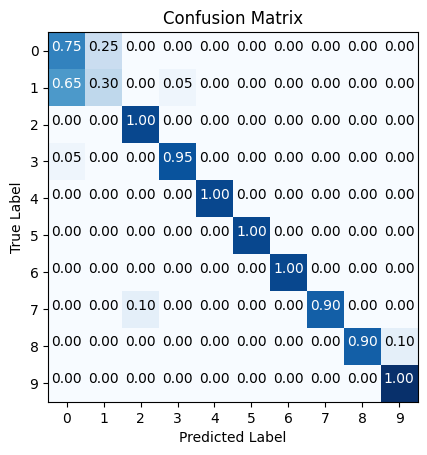

In [10]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import Normalize

cm = confusion_matrix(test_labels, y_pred)

plt.imshow(cm, cmap='Blues', norm=Normalize(vmin=0, vmax=np.max(cm)))
# plt.colorbar()

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0

# 将混淆矩阵中的每个元素转换为保留两位小数的百分比形式
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm_percentage[i, j], '.2f'),
                  horizontalalignment="center",
                  color="white" if cm[i, j] > thresh else "black")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [14]:
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 计算分类报告
report = classification_report(test_labels, y_pred)

# 将报告中每个类别的指标保留小数点后四位
lines = report.split('\n')
new_report = []
for line in lines:
    if line.startswith('weighted avg'):
        items = line.split()
        new_line = '  '.join(items[:2])
        for item in items[2:]:
            if item.isnumeric():
                new_line += f'  {item}'
            else:
                new_line += f'  {float(item):.4f}'
        new_report.append(new_line)
    elif len(line.split()) > 0 and line.split()[0].isdigit():
        items = line.split()
        new_line = '  '.join(items[:2])
        for item in items[2:]:
            new_line += f'  {float(item):.4f}'
        new_report.append(new_line)
    else:
        new_report.append(line)

formatted_report = '\n'.join(new_report)
print(formatted_report)


              precision    recall  f1-score   support

0  0.52  0.7500  0.6100  20.0000
1  0.55  0.3000  0.3900  20.0000
2  0.91  1.0000  0.9500  20.0000
3  0.95  0.9500  0.9500  20.0000
4  1.00  1.0000  1.0000  20.0000
5  1.00  1.0000  1.0000  20.0000
6  1.00  1.0000  1.0000  20.0000
7  1.00  0.9000  0.9500  20.0000
8  1.00  0.9000  0.9500  20.0000
9  0.92  1.0000  0.9600  22.0000

    accuracy                           0.88       202
   macro avg       0.88      0.88      0.88       202
weighted  avg  0.8800  0.8800  0.8800  202

